<a href="https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs/tutorials/MMClassification_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMClassification Python API tutorial on Colab

In this tutorial, we will introduce the following content:

* How to install MMCls
* Inference a model with Python API
* Fine-tune a model with Python API

## Install MMClassification

Before using MMClassification, we need to prepare the environment with the following steps:

1. Install Python, CUDA, C/C++ compiler and git
2. Install PyTorch (CUDA version)
3. Install mmcv
4. Clone mmcls source code from GitHub and install it

Because this tutorial is on Google Colab, and the basic environment has been completed, we can skip the first two steps.

### Check environment

In [ ]:
%cd /content

/content


In [ ]:
!pwd

/content


In [ ]:
# Check nvcc version
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# Check GCC version
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Check PyTorch installation
import torch, torchvision
print(torch.__version__)
print(torch.cuda.is_available())

1.9.0+cu111
True


### Install MMCV

MMCV is the basic package of all OpenMMLab packages. We have pre-built wheels on Linux, so we can download and install them directly.

Please pay attention to PyTorch and CUDA versions to match the wheel.

In the above steps, we have checked the version of PyTorch and CUDA, and they are 1.9.0 and 11.1 respectively, so we need to choose the corresponding wheel.

In addition, we can also install the full version of mmcv (mmcv-full). It includes full features and various CUDA ops out of the box, but needs a longer time to build.

In [ ]:
# Install mmcv
!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
# !pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu110/torch1.9.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html
     |████████████████████████████████| 352 kB 5.2 MB/s 
     |████████████████████████████████| 185 kB 49.9 MB/s 
  Created wheel for mmcv: filename=mmcv-1.3.15-py2.py3-none-any.whl size=509835 sha256=793fe3796421336ca7a7740a1397a54016ba71ce95fd80cb80a116644adb4070
  Stored in directory: /root/.cache/pip/wheels/b2/f4/4e/8f6d2dd2bef6b7eb8c89aa0e5d61acd7bff60aaf3d4d4b29b0
Successfully built mmcv


### Clone and install MMClassification

Next, we clone the latest mmcls repository from GitHub and install it.

In [ ]:
# Clone mmcls repository
!git clone https://github.com/open-mmlab/mmclassification.git
%cd mmclassification/

# Install MMClassification from source
!pip install -e . 

Cloning into 'mmclassification'...
remote: Enumerating objects: 4152, done.
remote: Counting objects: 100% (994/994), done.
remote: Compressing objects: 100% (576/576), done.
remote: Total 4152 (delta 476), reused 765 (delta 401), pack-reused 3158
Receiving objects: 100% (4152/4152), 8.20 MiB | 21.00 MiB/s, done.
Resolving deltas: 100% (2524/2524), done.


In [1]:
# Check MMClassification installation
import mmcls
print(mmcls.__version__)

0.24.0


## Inference a model with Python API

MMClassification provides many pre-trained models, and you can check them by the link of [model zoo](https://mmclassification.readthedocs.io/en/latest/model_zoo.html). Almost all models can reproduce the results in original papers or reach higher metrics. And we can use these models directly.

To use the pre-trained model, we need to do the following steps:

- Prepare the model
  - Prepare the config file
  - Prepare the checkpoint file
- Build the model
- Inference with the model

In [9]:
# Get the demo image
!wget https://www.dropbox.com/s/k5fsqi6qha09l1v/banana.png?dl=0 -O ../../../demo/banana.png

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1c4a99b9b20>
c:\Users\USER\anaconda3\envs\bmc\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
c:\Users\USER\anaconda3\envs\bmc\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
c:\Users\USER\anaconda3\envs\bmc\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [3]:
from PIL import Image
Image.open('demo/banana.png')

FileNotFoundError: [Errno 2] No such file or directory: 'demo/banana.png'

### Prepare the config file and checkpoint file

We configure a model with a config file and save weights with a checkpoint file.

On GitHub, you can find all these pre-trained models in the config folder of MMClassification. For example, you can find the config files and checkpoints of Mobilenet V2 in [this link](https://github.com/open-mmlab/mmclassification/tree/master/configs/mobilenet_v2).

We have integrated many config files for various models in the MMClassification repository. As for the checkpoint, we can download it in advance, or just pass an URL to API, and MMClassification will download it before load weights.

In [6]:
# Confirm the config file exists
!ls configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py

# Specify the path of the config file and checkpoint file.
config_file = '../../../configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py'
checkpoint_file = 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### Inference the model

MMClassification provides high-level Python API to inference models.

At first, we build the MobilenetV2 model and load the checkpoint.

In [7]:
import mmcv
from mmcls.apis import inference_model, init_model, show_result_pyplot

# Specify the device, if you cannot use GPU, you can also use CPU 
# by specifying `device='cpu'`.
device = 'cuda:0'
# device = 'cpu'

# Build the model according to the config file and load the checkpoint.
model = init_model(config_file, checkpoint_file, device=device)

load checkpoint from http path: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


Downloading: "https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth" to C:\Users\USER/.cache\torch\hub\checkpoints\mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


  0%|          | 0.00/13.5M [00:00<?, ?B/s]

d:\project\bowel_movement_cleaness\mmclassification_bowel\mmcls\apis\inference.py:45: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [8]:
# The model's inheritance relationship
model.__class__.__mro__

(mmcls.models.classifiers.image.ImageClassifier,
 mmcls.models.classifiers.base.BaseClassifier,
 mmcv.runner.base_module.BaseModule,
 torch.nn.modules.module.Module,
 object)

In [12]:
# The inference result in a single image
img = '../../../demo/bird.JPEG'
img_array =  mmcv.imread(img)
result = inference_model(model, img_array)
result

{'pred_label': 12,
 'pred_score': 0.9956101775169373,
 'pred_class': 'house finch, linnet, Carpodacus mexicanus'}

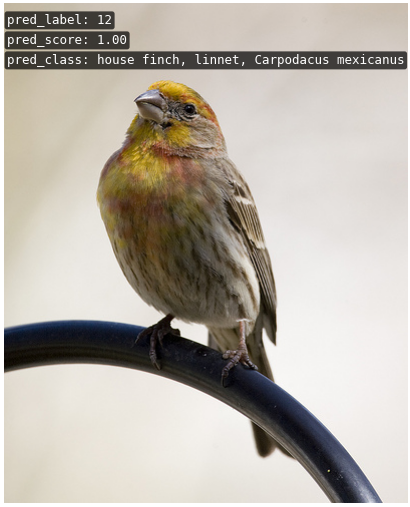

In [13]:
%matplotlib inline
# Visualize the inference result
show_result_pyplot(model, img, result)

## Fine-tune a model with Python API

Fine-tuning is to re-train a model which has been trained on another dataset (like ImageNet) to fit our target dataset. Compared with training from scratch, fine-tuning is much faster can avoid over-fitting problems during training on a small dataset.

The basic steps of fine-tuning are as below:

1. Prepare the target dataset and meet MMClassification's requirements.
2. Modify the training config.
3. Start training and validation.

More details are in [the docs](https://mmclassification.readthedocs.io/en/latest/tutorials/finetune.html).

### Prepare the target dataset

Here we download the cats & dogs dataset directly. You can find more introduction about the dataset in the [tools tutorial](https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs/tutorials/MMClassification_tools.ipynb).

In [ ]:
# Download the cats & dogs dataset
!wget https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0 -O cats_dogs_dataset.zip
!mkdir -p data
!unzip -qo cats_dogs_dataset.zip -d ./data/

--2021-10-21 03:57:58--  https://www.dropbox.com/s/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip [following]
--2021-10-21 03:57:58--  https://www.dropbox.com/s/raw/wml49yrtdo53mie/cats_dogs_dataset_reorg.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd8157272a6270e100392293da.dl.dropboxusercontent.com/cd/0/inline/BYbFG6Zo1S3l2kJtqLrJIne9lTLgQn-uoJxmUjhLSkp36V7AoiwlyR2gP0XVoUQt9WzF2ZsmeERagMy7rpsNoIYG4MjsYA90i_JsarFDs9PHhXHw9qwHpHqBvgd4YU_mwDQHuouJ_oCU1kft04QgCVRg/file# [following]
--2021-10-21 03:57:59--  https://ucfd8157272a6270e100392293da.dl.dropboxusercontent.com/cd/0/inline/BYbFG6Zo1S3l2kJtqLrJIne9lTLgQn-uoJxmUj

### Read the config file and modify the config

In the [tools tutorial](https://colab.research.google.com/github/open-mmlab/mmclassification/blob/master/docs/tutorials/MMClassification_tools.ipynb), we have introduced all parts of the config file, and here we can modify the loaded config by Python code.

In [ ]:
# Load the base config file
from mmcv import Config
from mmcls.utils import auto_select_device

cfg = Config.fromfile('configs/mobilenet_v2/mobilenet-v2_8xb32_in1k.py')
cfg.device = auto_select_device()

# Modify the number of classes in the head.
cfg.model.head.num_classes = 2
cfg.model.head.topk = (1, )

# Load the pre-trained model's checkpoint.
cfg.model.backbone.init_cfg = dict(type='Pretrained', checkpoint=checkpoint_file, prefix='backbone')

# Specify sample size and number of workers.
cfg.data.samples_per_gpu = 32
cfg.data.workers_per_gpu = 2

# Specify the path and meta files of training dataset
cfg.data.train.data_prefix = 'data/cats_dogs_dataset/training_set/training_set'
cfg.data.train.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the path and meta files of validation dataset
cfg.data.val.data_prefix = 'data/cats_dogs_dataset/val_set/val_set'
cfg.data.val.ann_file = 'data/cats_dogs_dataset/val.txt'
cfg.data.val.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the path and meta files of test dataset
cfg.data.test.data_prefix = 'data/cats_dogs_dataset/test_set/test_set'
cfg.data.test.ann_file = 'data/cats_dogs_dataset/test.txt'
cfg.data.test.classes = 'data/cats_dogs_dataset/classes.txt'

# Specify the normalization parameters in data pipeline
normalize_cfg = dict(type='Normalize', mean=[124.508, 116.050, 106.438], std=[58.577, 57.310, 57.437], to_rgb=True)
cfg.data.train.pipeline[3] = normalize_cfg
cfg.data.val.pipeline[3] = normalize_cfg
cfg.data.test.pipeline[3] = normalize_cfg

# Modify the evaluation metric
cfg.evaluation['metric_options']={'topk': (1, )}

# Specify the optimizer
cfg.optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=0.0001)
cfg.optimizer_config = dict(grad_clip=None)

# Specify the learning rate scheduler
cfg.lr_config = dict(policy='step', step=1, gamma=0.1)
cfg.runner = dict(type='EpochBasedRunner', max_epochs=2)

# Specify the work directory
cfg.work_dir = './work_dirs/cats_dogs_dataset'

# Output logs for every 10 iterations
cfg.log_config.interval = 10

# Set the random seed and enable the deterministic option of cuDNN
# to keep the results' reproducible.
from mmcls.apis import set_random_seed
cfg.seed = 0
set_random_seed(0, deterministic=True)

cfg.gpu_ids = range(1)

### Fine-tune the model

Use the API `train_model` to fine-tune our model on the cats & dogs dataset.

In [ ]:
import time
import mmcv
import os.path as osp

from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model

# Create the work directory
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# Build the classifier
model = build_classifier(cfg.model)
model.init_weights()
# Build the dataset
datasets = [build_dataset(cfg.data.train)]
# Add `CLASSES` attributes to help visualization
model.CLASSES = datasets[0].CLASSES
# Start fine-tuning
train_model(
    model,
    datasets,
    cfg,
    distributed=False,
    validate=True,
    timestamp=time.strftime('%Y%m%d_%H%M%S', time.localtime()),
    meta=dict())

2021-10-21 04:04:12,758 - mmcv - INFO - initialize MobileNetV2 with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth', 'prefix': 'backbone'}
2021-10-21 04:04:12,759 - mmcv - INFO - load backbone in model from: https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
2021-10-21 04:04:12,815 - mmcv - INFO - initialize LinearClsHead with init_cfg {'type': 'Normal', 'layer': 'Linear', 'std': 0.01}
2021-10-21 04:04:12,818 - mmcv - INFO - 
backbone.conv1.conv.weight - torch.Size([32, 3, 3, 3]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2021-10-21 04:04:12,821 - mmcv - INFO - 
backbone.conv1.bn.weight - torch.Size([32]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilen

Use load_from_http loader


2021-10-21 04:04:12,965 - mmcv - INFO - 
backbone.layer5.0.conv.2.conv.weight - torch.Size([96, 384, 1, 1]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2021-10-21 04:04:12,967 - mmcv - INFO - 
backbone.layer5.0.conv.2.bn.weight - torch.Size([96]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2021-10-21 04:04:12,969 - mmcv - INFO - 
backbone.layer5.0.conv.2.bn.bias - torch.Size([96]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2021-10-21 04:04:12,970 - mmcv - INFO - 
backbone.layer5.1.conv.0.conv.weight - torch.Size([576, 96, 1, 1]): 
PretrainedInit: load from https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth 
 
2021

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 104.1 task/s, elapsed: 15s, ETA:     0s

2021-10-21 04:05:27,767 - mmcls - INFO - Epoch(val) [1][51]	accuracy_top-1: 95.6277
2021-10-21 04:05:32,987 - mmcls - INFO - Epoch [2][10/201]	lr: 5.000e-04, eta: 0:00:57, time: 0.505, data_time: 0.238, memory: 1709, loss: 0.1764
2021-10-21 04:05:35,779 - mmcls - INFO - Epoch [2][20/201]	lr: 5.000e-04, eta: 0:00:54, time: 0.278, data_time: 0.020, memory: 1709, loss: 0.1514
2021-10-21 04:05:38,537 - mmcls - INFO - Epoch [2][30/201]	lr: 5.000e-04, eta: 0:00:51, time: 0.276, data_time: 0.020, memory: 1709, loss: 0.1395
2021-10-21 04:05:41,283 - mmcls - INFO - Epoch [2][40/201]	lr: 5.000e-04, eta: 0:00:48, time: 0.275, data_time: 0.020, memory: 1709, loss: 0.1508
2021-10-21 04:05:44,017 - mmcls - INFO - Epoch [2][50/201]	lr: 5.000e-04, eta: 0:00:44, time: 0.274, data_time: 0.021, memory: 1709, loss: 0.1771
2021-10-21 04:05:46,800 - mmcls - INFO - Epoch [2][60/201]	lr: 5.000e-04, eta: 0:00:41, time: 0.278, data_time: 0.020, memory: 1709, loss: 0.1438
2021-10-21 04:05:49,570 - mmcls - INFO -

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1601/1601, 105.5 task/s, elapsed: 15s, ETA:     0s

2021-10-21 04:06:40,694 - mmcls - INFO - Epoch(val) [2][51]	accuracy_top-1: 97.5016


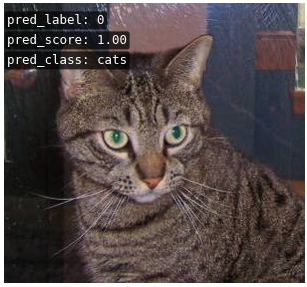

In [ ]:
%matplotlib inline
# Validate the fine-tuned model

img = mmcv.imread('data/cats_dogs_dataset/training_set/training_set/cats/cat.1.jpg')

model.cfg = cfg
result = inference_model(model, img)

show_result_pyplot(model, img, result)